In [49]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [50]:
df = pd.read_csv('cleaned_movies.csv')


# Simple Resampling - Random Oversampling

In [51]:
from imblearn.over_sampling import RandomOverSampler

X = df.drop(columns=['genres', 'original_language', 'popularity_class', 'popularity']).copy()
y = df['popularity_class']

# should we add differt binding for oversampling?
# in this type of resampling we need numeric feature I added the mean value, but maybe for different algorithm just adding nr index instead of for example genres will be better?

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

df_resampled = pd.concat([X_resampled.reset_index(drop=True),
                          pd.Series(y_resampled, name='popularity_class')], axis=1)

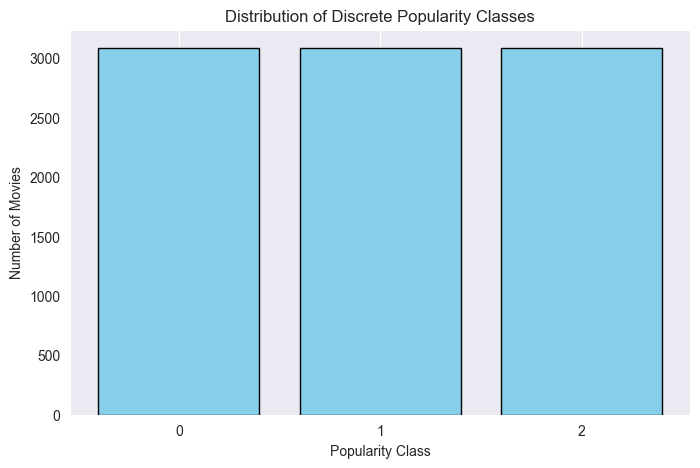

In [52]:
import matplotlib.pyplot as plt

class_counts = df_resampled['popularity_class'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index.astype(str), class_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Discrete Popularity Classes')
plt.xlabel('Popularity Class')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.savefig('histogram_popularity_simply_resampling_discrete.png')
plt.show()  

In [53]:
X = df_resampled.drop(columns=['popularity_class']).copy()
y = df_resampled['popularity_class']

print(X.dtypes)

budget              int64
runtime           float64
vote_average      float64
vote_count          int64
revenue             int64
release_year        int64
genres_score      float64
language_score    float64
dtype: object


# SVM

In [54]:
from sklearn.svm import SVC

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")


Fold 1 - Acc: 0.8801 | Prec: 0.8791 | Rec: 0.8799 | F1: 0.8787
Fold 2 - Acc: 0.8887 | Prec: 0.8878 | Rec: 0.8890 | F1: 0.8882
Fold 3 - Acc: 0.8925 | Prec: 0.8913 | Rec: 0.8918 | F1: 0.8910
Fold 4 - Acc: 0.9011 | Prec: 0.9004 | Rec: 0.9006 | F1: 0.9005
Fold 5 - Acc: 0.8876 | Prec: 0.8874 | Rec: 0.8889 | F1: 0.8874

--- Summary ---
Mean Accuracy: 0.8900
Mean Precision: 0.8892
Mean Recall: 0.8900
Mean F1-score: 0.8892


# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.9011 | Prec: 0.8998 | Rec: 0.9011 | F1: 0.8998
Fold 2 - Acc: 0.8925 | Prec: 0.8922 | Rec: 0.8947 | F1: 0.8932
Fold 3 - Acc: 0.9152 | Prec: 0.9141 | Rec: 0.9151 | F1: 0.9144
Fold 4 - Acc: 0.9098 | Prec: 0.9068 | Rec: 0.9069 | F1: 0.9064
Fold 5 - Acc: 0.9157 | Prec: 0.9152 | Rec: 0.9169 | F1: 0.9157

--- Summary ---
Mean Accuracy: 0.9069
Mean Precision: 0.9056
Mean Recall: 0.9069
Mean F1-score: 0.9059


# DECISION TREE

In [56]:
from sklearn.tree import DecisionTreeClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

pipeline = Pipeline([
    ('tree', DecisionTreeClassifier(random_state=42))
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)


# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.9633 | Prec: 0.9639 | Rec: 0.9633 | F1: 0.9632
Fold 2 - Acc: 0.9595 | Prec: 0.9602 | Rec: 0.9606 | F1: 0.9602
Fold 3 - Acc: 0.9562 | Prec: 0.9560 | Rec: 0.9563 | F1: 0.9561
Fold 4 - Acc: 0.9665 | Prec: 0.9665 | Rec: 0.9650 | F1: 0.9655
Fold 5 - Acc: 0.9606 | Prec: 0.9614 | Rec: 0.9608 | F1: 0.9609

--- Summary ---
Mean Accuracy: 0.9612
Mean Precision: 0.9616
Mean Recall: 0.9612
Mean F1-score: 0.9612


# MULTILAYER PERCEPTRON (MLP)

In [57]:
from sklearn.neural_network import MLPClassifier

accuracies = []
precisions = []
recalls = []
f1s = []

mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),     # two hidden layers: 100 and 50 neurons
    activation='relu',                # a commonly used activation function
    solver='adam',                    # modern optimizer, better than 'sgd' in most cases
    learning_rate_init=0.001,         # lower learning rate improves stability
    max_iter=1000,                    # more iterations to allow convergence
    early_stopping=True,              # stops training if validation score doesn't improve
    random_state=42                   # ensures reproducibility
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', mlp)
])


kf = KFold(n_splits=5, shuffle=True, random_state=42)


# 5-fold cross-validation
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1s.append(f1)

    print(f"Fold {fold+1} - Acc: {acc:.4f} | Prec: {prec:.4f} | Rec: {rec:.4f} | F1: {f1:.4f}")


print("\n--- Summary ---")
print(f"Mean Accuracy: {np.mean(accuracies):.4f}")
print(f"Mean Precision: {np.mean(precisions):.4f}")
print(f"Mean Recall: {np.mean(recalls):.4f}")
print(f"Mean F1-score: {np.mean(f1s):.4f}")

Fold 1 - Acc: 0.9352 | Prec: 0.9350 | Rec: 0.9351 | F1: 0.9346
Fold 2 - Acc: 0.9395 | Prec: 0.9395 | Rec: 0.9408 | F1: 0.9398
Fold 3 - Acc: 0.9454 | Prec: 0.9452 | Rec: 0.9455 | F1: 0.9452
Fold 4 - Acc: 0.9373 | Prec: 0.9369 | Rec: 0.9356 | F1: 0.9361
Fold 5 - Acc: 0.9541 | Prec: 0.9542 | Rec: 0.9546 | F1: 0.9543

--- Summary ---
Mean Accuracy: 0.9423
Mean Precision: 0.9421
Mean Recall: 0.9423
Mean F1-score: 0.9420
